Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [14]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    #intialzie variables
    hires = 0
    best = -float("inf")
    
    #hire if applicant is better than the current one
    for i in applicants:
        if i > best:
            best = i
            hires+=1
            
    return hires

In [15]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [80]:
import random

def experimental_hires(N):
    #intitalize variables and simulation
    sim_lst = []
    sim = 100
    
    #simulation for 100 time
    for i in range(sim):
        
        #randomly create a list of applicants
        lst = [random.randint(-100,100) for i in range(N)]
        
        #find the hiring number
        result = hire_assistant(lst)
        sim_lst.append(result)
    #average the hiring number
    average=sum(sim_lst)/sim
    return average

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [81]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

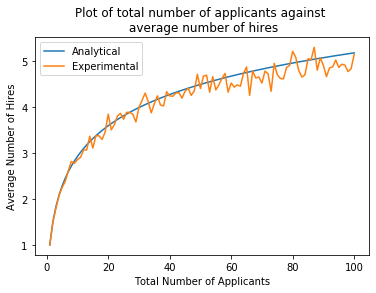

In [97]:
import matplotlib.pyplot as plt

#the applicant size from 1 to 100
x = [i for i in range(1,101,1)]

#input the list into the experimental and analytical hires 
analytic = [analytical_hires(N) for N in x]
experiment = [experimental_hires(N) for N in x]

#plot the graph
plt.plot(x, analytic, label="Analytical")
plt.plot(x, experiment, label="Experimental")
plt.title("Plot of total number of applicants against \n average number of hires")
plt.xlabel("Total Number of Applicants")
plt.ylabel("Average Number of Hires")

plt.legend()
plt.show()


## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

In [93]:
#probability if exactly one number is hired at each N
def experimental_hires_1(N):
    #intitalize variables and simulation
    sim_lst = []
    sim = 100
    
    #simulation for 100 time
    for i in range(sim):
        
        #randomly create a list of applicants
        lst = [random.randint(-100,100) for i in range(N)]
        
        #find the hiring number
        result = hire_assistant(lst)
        
        #register each case when only when assistant is hired
        if result == 1: sim_lst.append(1)
            
    #average the hiring number
    average=sum(sim_lst)/sim
    return average

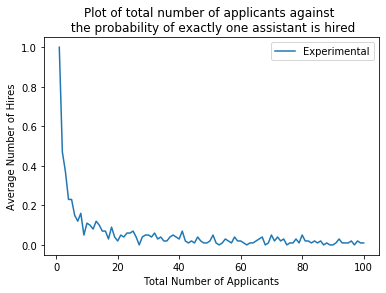

In [98]:
#the applicant size from 1 to 100
x = [i for i in range(1,101,1)]

#input the list into the experimental hires
experimental = [experimental_hires_1(N) for N in x]

#plot the graph
plt.plot(x, experimental, label="Experimental")
plt.title("Plot of total number of applicants against \n the probability of exactly one assistant is hired")
plt.xlabel("Total Number of Applicants")
plt.ylabel("Average Number of Hires")

plt.legend()
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

We still need to generate a random sample to enforced a random order in order to get the expected value of the case.

## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2. In the first command, it is possible to get duplicates. In command 3, this line would give you n floats between 0 to 1, which could give you duplicates as well.

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [104]:
import numpy as np
def hat_check(N):
    
    #generate randomly shuffled list
    hat_list = list(range(N)) 
    np.random.shuffle(hat_list)
    
    #count the hats that are correctly returned
    count = 0
    for i in range(len(hat_list)):
        if i == hat_list[i]: count+=1
    return count

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

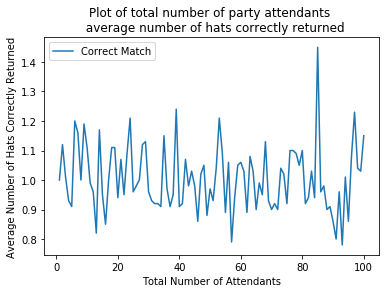

In [120]:
#the attendant size from 1 to 100
x = [i for i in range(1,101,1)]

#intialize the variable
hat_lst = []
sim = 100

#find the average number of hats return for each number of party attendants
for N in x:
    #intialize the list
    sim_lst = []
    for i in range(sim):
        
        #find the matching hats
        result=hat_check(N)
        sim_lst.append(result)
    #average the number for each N
    hat_lst.append(sum(sim_lst)/sim)

#plot the graph
plt.plot(x, hat_lst, label="Correct Match")
plt.title("Plot of total number of party attendants \n  average number of hats correctly returned")
plt.xlabel("Total Number of Attendants")
plt.ylabel("Average Number of Hats Correctly Returned")

plt.legend()
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

Using a theoretical approach, we can think of the probability of getting the correct hat for each individual hat as $1/i$ with $i$ being the number of attendants since we do not replace the hat after each hat-match. This is because there is $1/i$ probability for each hat to be picked at any given person. Therefore, the total number of matched hat expected is the sum of 1/i, which is $E[\sum^n_{i=n} X_i]$, with $X_i$ as the probability of each hat being matched. This is equivalent to $\sum^n_{i=n}E[X_i]=n\times1/n=1$. Therefore, the expect value is 1.

In [125]:
#the attendant size from 1 to 10000
x = [i for i in range(1,10001,1)]

#intialize the variable
hat_lst = []
sim = 10

#find the average number of hats return for each number of party attendants
for N in x:
    #intialize the list
    sim_lst = []
    for i in range(sim):
        
        #find the matching hats
        result=hat_check(N)
        sim_lst.append(result)
    #average the number for each N
    hat_lst.append(sum(sim_lst)/sim)

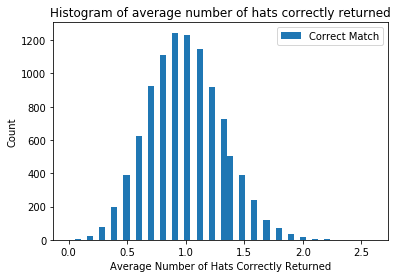

In [141]:
#plot the graph
plt.hist(hat_lst,bins=50, label="Correct Match")
plt.title("Histogram of average number of hats correctly returned")
plt.ylabel("Count")
plt.xlabel("Average Number of Hats Correctly Returned")

plt.legend()
plt.show()

In the empirical appraoch, we see as N increases, the average numeber of hats correctly returned will form a normal distribution around the value of 1, which corroborates with the theoretical approach.